In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sb
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
pisa2012clean = pd.read_csv('./Data/pisa2012clean.csv', encoding='latin-1', low_memory = False)
pisadict2012clean = pd.read_csv('./Data/pisadict2012clean.csv', encoding='latin-1', low_memory=False, index_col=0).T

In [3]:
pisadict2012clean

,Age,Occupational,Education,Home Setup,Socioeconomic
x,Age of student,Highest parental occupational status,Highest parental education in years,Home Possessions,"Index of economic, social and cultural status"


In [4]:
pisa2012clean

,Age,Occupational,Education,Home Setup,Socioeconomic,Country,Male,Math,Reading,Science,Total
0,16.17,NaN,12.0,-2.61,NaN,Albania,0,366.18634,261.01424,371.91348,333.038020
1,16.17,NaN,16.0,1.41,NaN,Albania,0,470.56396,384.68832,478.12382,444.458700
2,15.58,NaN,16.0,0.14,NaN,Albania,0,505.53824,405.18154,486.60946,465.776413
3,15.67,NaN,16.0,-0.73,NaN,Albania,0,449.45476,477.46376,453.97240,460.296973
4,15.50,NaN,12.0,-0.57,NaN,Albania,0,385.50398,256.01010,367.15778,336.223953
...,...,...,...,...,...,...,...,...,...,...,...
485485,15.83,18.95,9.0,-1.81,-2.08,Viet Nam,0,486.22058,472.61846,536.31110,498.383380
485486,16.17,35.34,9.0,-0.45,-1.22,Viet Nam,1,529.21794,487.24356,524.37522,513.612240
485487,15.83,35.34,9.0,-2.19,-1.92,Viet Nam,1,486.29850,476.25694,541.90600,501.487147
485488,15.83,18.95,17.0,-1.28,-0.71,Viet Nam,1,522.90856,518.43922,526.70646,522.684747


In [5]:
pisa2012clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Age            485374 non-null  float64
 1   Occupational   450621 non-null  float64
 2   Education      473091 non-null  float64
 3   Home Setup     479807 non-null  float64
 4   Socioeconomic  473648 non-null  float64
 5   Country        485490 non-null  object 
 6   Male           485490 non-null  int64  
 7   Math           485490 non-null  float64
 8   Reading        485490 non-null  float64
 9   Science        485490 non-null  float64
 10  Total          485490 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 40.7+ MB


In [6]:
Dependencies = ['Education', 'Occupational', 'Home Setup']
Subjects = ['Math', 'Reading', 'Science']

# Communicate Data Findings in PISA 2012

by Philipp Lutz

# Introduction


In this analysis, we look at data from the 2012 PISA study to gain insights into the academic performance of students worldwide. Particular attention is paid to the relationship between student performance and various socio-demographic factors. By analysing gender differences, socio-economic backgrounds and parental education levels, we open up a discussion about equality and educational opportunities. Our visualisations and analyses aim to create a deeper understanding of the distribution and determinants of student achievement.

# How are the total scores distributed by countries?

In [7]:
Total_mean = pisa2012clean.groupby('Country')['Total'].mean()
order = Total_mean.sort_values(ascending=False).index.tolist()

In [8]:
def plot_average_total_score():
    # Calculating mean total scores for males and females by country
    male_mean = pisa2012clean.query("Male == 1").groupby('Country')['Total'].mean()
    female_mean = pisa2012clean.query("Male == 0").groupby('Country')['Total'].mean()

    # Setting up y-axis ticks
    ybins = np.arange(10, 900 + 20, 20)
    yticks = ybins[::1] - 10

    # Creating the plot
    fig, ax1 = plt.subplots(figsize=(25, 10))
    plt.yticks(yticks)
    plt.xticks(rotation=60, ha='right')
    
    # Boxplot showing the interquartile range (IQR)
    sb.boxplot(data=pisa2012clean, x='Country', y='Total', order=order, showfliers=False, whis=0, color='lightgray', ax=ax1, width=.5, linewidth=.5)
    
    # Adding gridlines
    plt.grid(True, linestyle='--', linewidth=.3)

    # Plotting average markers for each country
    for i, country in enumerate(order):
        mean_val = Total_mean[country]
        mean_val_male = male_mean[country]
        mean_val_female = female_mean[country]
 
        ax1.plot(i, mean_val_male, marker='o', color='blue', markersize=8)
        ax1.plot(i, mean_val_female, marker='o', color='orange', markersize=8)
        ax1.plot(i, mean_val, marker='x', color='black', markersize=8)

    # Setting labels and title
    ax1.set_ylabel('Total Scores', fontsize=16)
    ax1.set_xlabel('')
    plt.title('Total Scores: IQR with Avg. Markers by Countries', fontsize=24)
    
    # Adding legend
    legend_labels = ['Total Avg.', 'Male Avg.', 'Female Avg.']
    legend_handles = [plt.Line2D([0], [0], marker='x', color='black', markersize=24, linestyle='None'),
                      plt.Line2D([0], [0], marker='o', color='blue', markersize=24, linestyle='None'),
                      plt.Line2D([0], [0], marker='o', color='orange', markersize=24, linestyle='None')]
    plt.legend(legend_handles, legend_labels, fontsize=24)


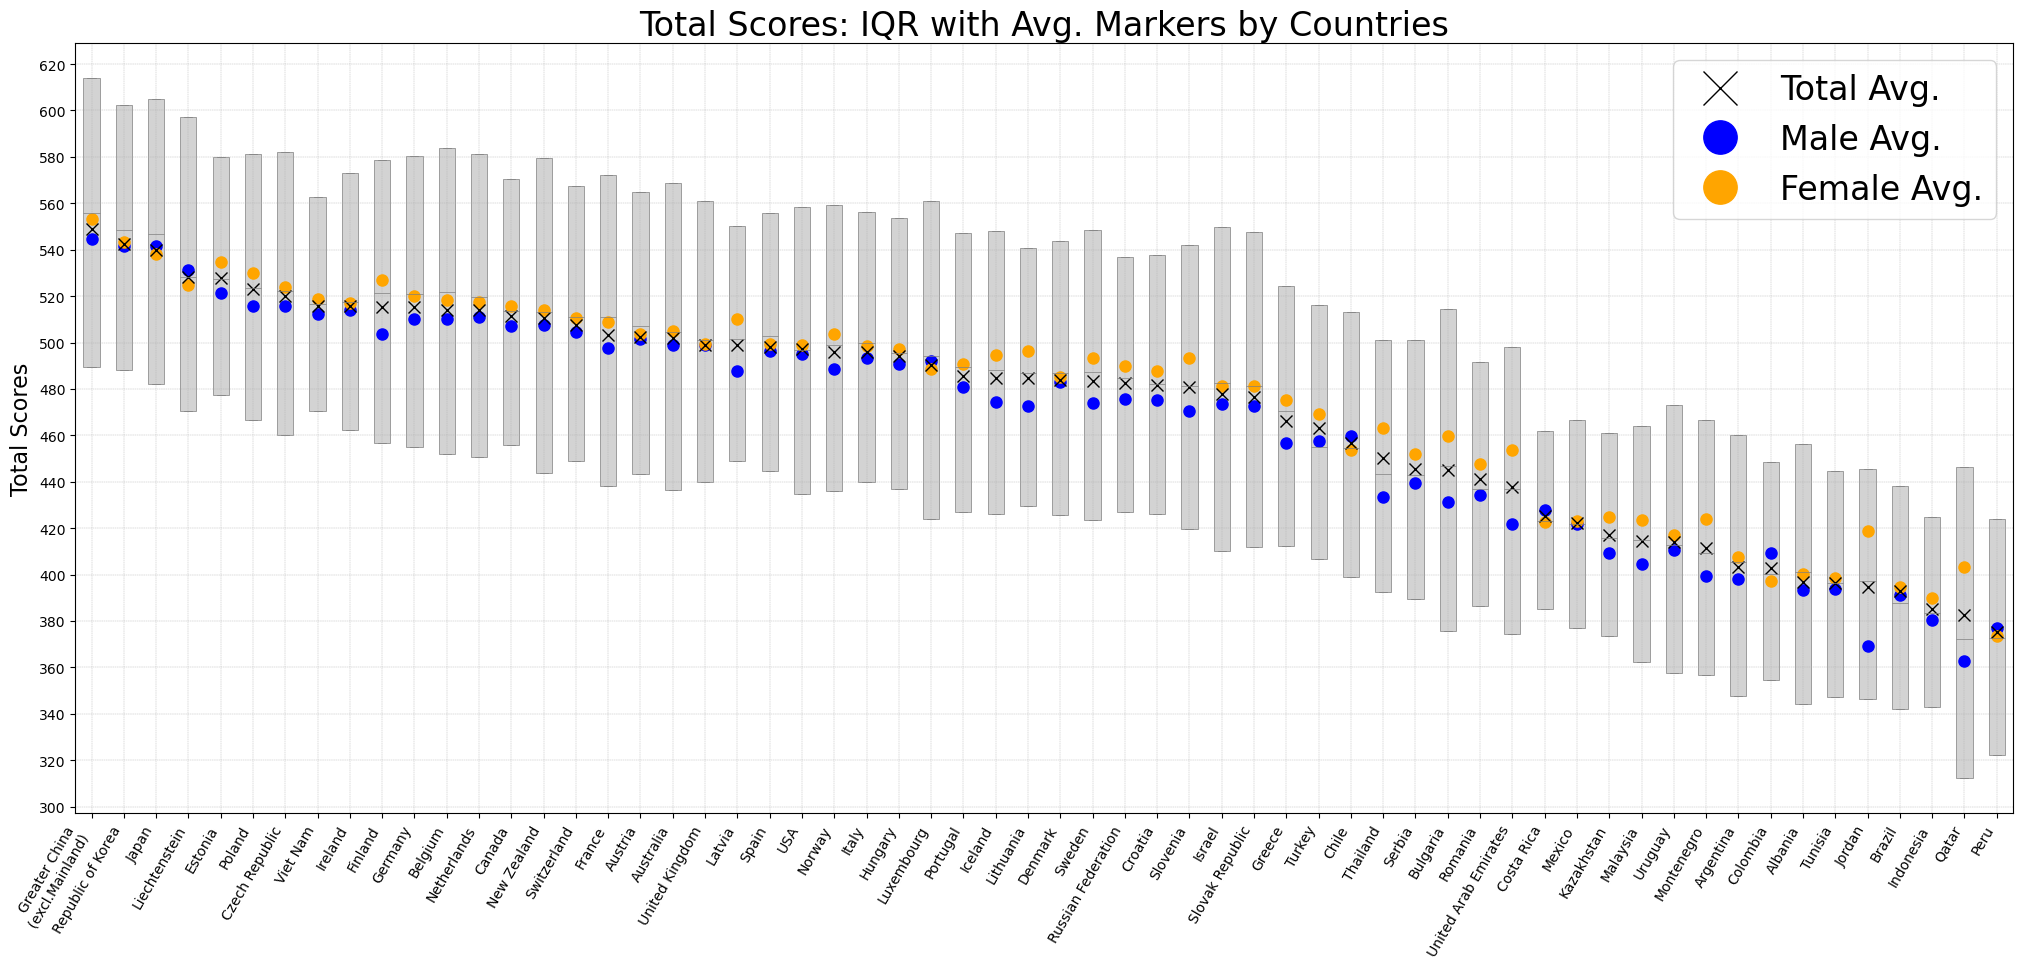

In [9]:
plot_average_total_score()
plt.savefig('./PNG/Total_Scores_IQR_with_Avg_Markers_by_Countries.png', bbox_inches='tight', dpi=300)

The boxplot displays total score distributions of students across countries. Each country's interquartile range (IQR) represents the middle 50% of scores. Notably, Greater China has the highest mean score and quartiles. Women generally outperform men, with few exceptions warranting further investigation. Non-Western countries tend to have lower performance. Jordan exhibits the largest gender gap, while Qatar's large IQR contrasts with Costa Rica's narrow one, indicating differing levels of performance variability.

# How are the total scores distributed by gender?

In [10]:
def plot_score_distribution(pisa_2012_clean, Subjects):
    # Create a figure with appropriate size
    plt.figure(figsize=[25, 1+9/len(Subjects)])
    
    # Define bin edges for x and y axes
    xbins = np.arange(10, 900 + 20, 20)
    ybins = np.arange(0, .0042 + .0002, .0002)
    
    # Define tick locations for x and y axes
    xticks = xbins[::len(Subjects)] - 10
    yticks = ybins[::len(Subjects)]
    
    # Iterate over each subject and plot the distribution by gender
    for col_index, Subject in enumerate(Subjects):
        ax = plt.subplot(1, len(Subjects), col_index + 1)
        
        # Plot kernel density estimate (KDE) for male and female scores
        sb.kdeplot(data=pisa_2012_clean[pisa_2012_clean['Male'] == 1][Subject], label='Male', color='blue', ax=ax)
        sb.kdeplot(data=pisa_2012_clean[pisa_2012_clean['Male'] == 0][Subject], label='Female', color='orange', ax=ax)    
        
        # Set tick locations and labels for x and y axes
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_xticklabels(xticks, rotation=15) 
        ax.set_yticklabels((yticks*1000).round(1))
        
        # Add grid lines and set axis limits
        ax.grid(axis='y', linestyle='--', alpha=.5)
        ax.set_xlim(0, 910)
        ax.set_ylim(0, .0042)
        
        # Set title, x-axis label, and y-axis label
        ax.set_title(Subject, fontsize=16)
        ax.set_xlabel(f'{Subject} Scores', fontsize=16)
        ax.set_ylabel('Parts per thousand' if col_index == 0 else '', fontsize=16)
        
        # Add legend
        ax.legend(loc='lower center', fontsize=8+24/len(Subjects))

    # Set super title
    plt.suptitle(f'Distribution of Student Scores {"across Subjects " if Subjects != ["Total"] else ""}by Gender', fontsize=24, y=.89+len(Subjects)/18)

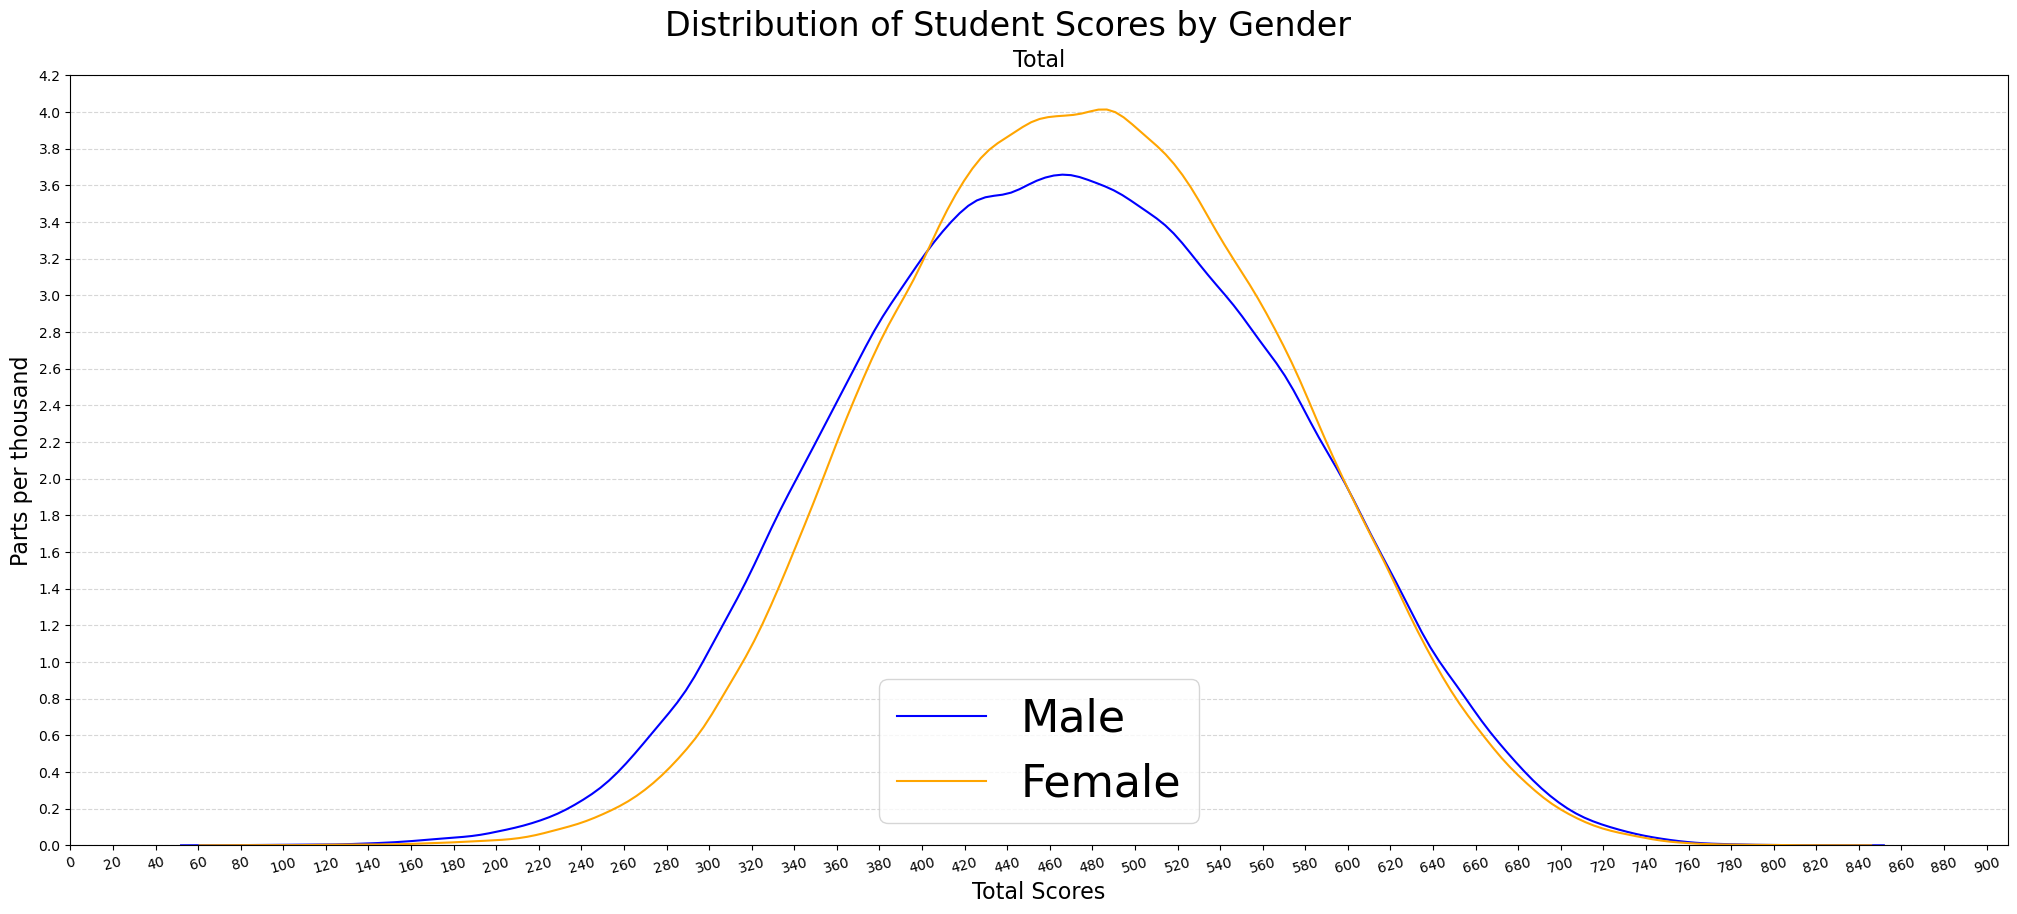

In [11]:
plot_score_distribution(pisa2012clean, Subjects=['Total'])
plt.savefig('./PNG/Distribution_of_Student_Scores_by_Gender.png', bbox_inches='tight', dpi=300)

The distribution of total scores, broken down by gender, shows that male students generally have lower scores, but are more frequently represented in the higher scores than female students. The distributions of both genders appear normally distributed, indicating that there are no extreme deviations from a bell curve typical of many biological and social processes.

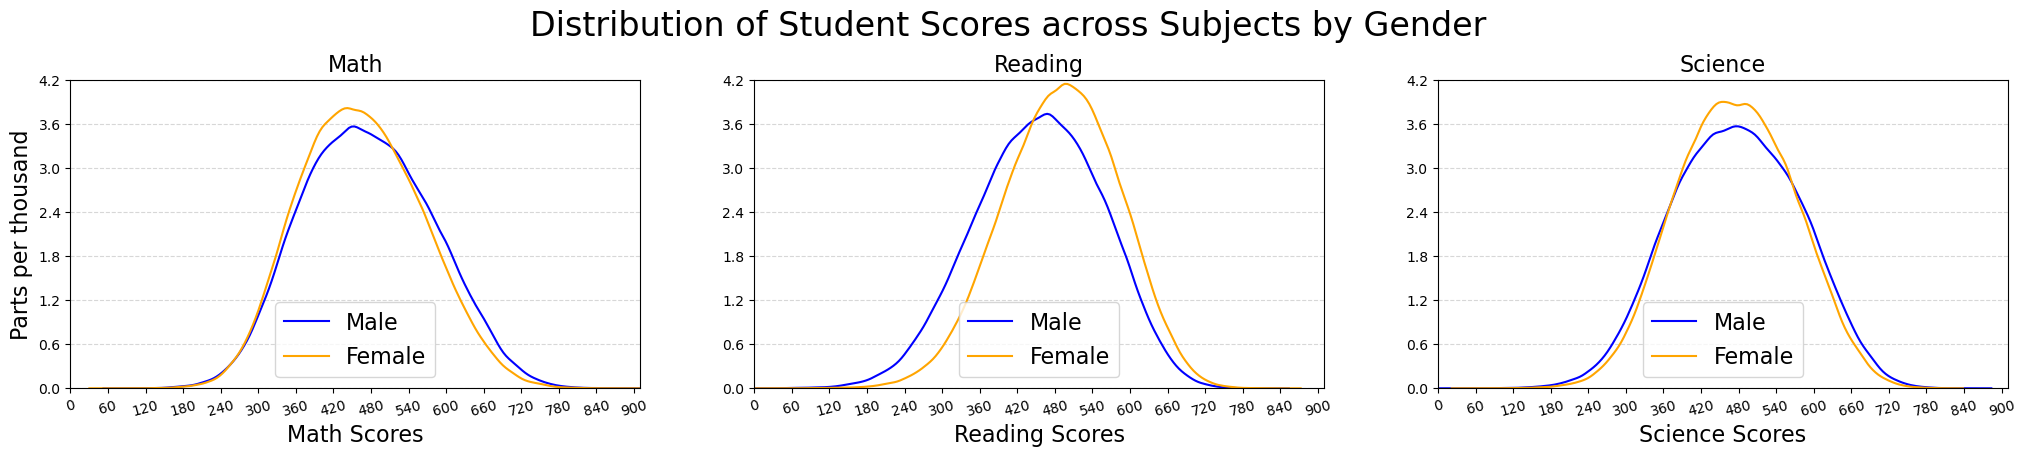

In [12]:
plot_score_distribution(pisa2012clean, Subjects)
plt.savefig('./PNG/Distribution_of_Student_Scores_across_Subjects_by_Gender.png', bbox_inches='tight', dpi=300)

These three diagrams show the distribution of scores in maths, reading and science, each broken down by gender. In maths, male pupils appear to perform slightly better, while female pupils are in the lead in reading. In science, the performance of both genders is very similar. These patterns may indicate specific educational trends or cultural influences.

# What is the relationship between the Scores and the parental factors?

In [13]:
def plot_dependent_distribution(pisa_2012_clean, Subjects, Dependencies):
    # Create subplots grid
    fig, axs = plt.subplots(len(Dependencies), len(Subjects), figsize=(25, 12), squeeze=False)   
    
    # Define bins and xticks
    bins = np.arange(10, 900 + 20, 20)
    xticks = bins[::len(Subjects)] - 10

    # Iterate over rows and columns
    for row_index, Dependency in enumerate(Dependencies):
        for col_index, Subject in enumerate(Subjects):
            # Add jitter to the dependent variable
            jittered_dependent = pisa_2012_clean[Dependency] + np.random.uniform(-.35, .35, size=len(pisa_2012_clean))
            # Calculate correlation coefficient
            correlation = pisa_2012_clean[Subject].corr(pisa_2012_clean[Dependency])
            # Create hexbin plot
            hb = axs[row_index, col_index].hexbin(pisa_2012_clean[Subject], jittered_dependent, bins='log', vmin=1, vmax=2000)
            
            # Customize x-axis
            axs[row_index, col_index].set_xticks(xticks)
            axs[row_index, col_index].set_xticklabels(xticks, rotation=15)
            axs[row_index, col_index].set_xlim(0, 910)
            
            # Add correlation coefficient text
            axs[row_index, col_index].text(.84, .02, f'ρ = {correlation:.2f}', transform=axs[row_index, col_index].transAxes, fontsize=54/len(Subjects)-4)
            
            # Set title, x-axis label, and y-axis label
            axs[row_index, col_index].set_title(f'{Subject} | {Dependency}', fontsize=10)
            axs[row_index, col_index].set_xlabel(f'{Subject} Scores' if row_index == len(Dependencies)-1 else '', fontsize=16)
            axs[row_index, col_index].set_ylabel(f'{Dependency} Index' if col_index == 0 else '', fontsize=16)

        # Add colorbar
        cbar_ax = fig.add_axes([.91, .11 + row_index * .272, .01, (.815 / len(Dependencies))-.045])
        cbar = fig.colorbar(hb, cax=cbar_ax)
        cbar.set_ticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
        cbar.ax.yaxis.set_major_formatter(ScalarFormatter())
        cbar.set_label('Frequency', fontsize=16)

    # Add overall title
    plt.suptitle(f'Distribution of Student Scores {(Subjects != ["Total"]) * "across Subjects "}depending on Parental Factors{(Dependencies == ["Socioeconomic"]) * " together"}', fontsize=24, y=.93)

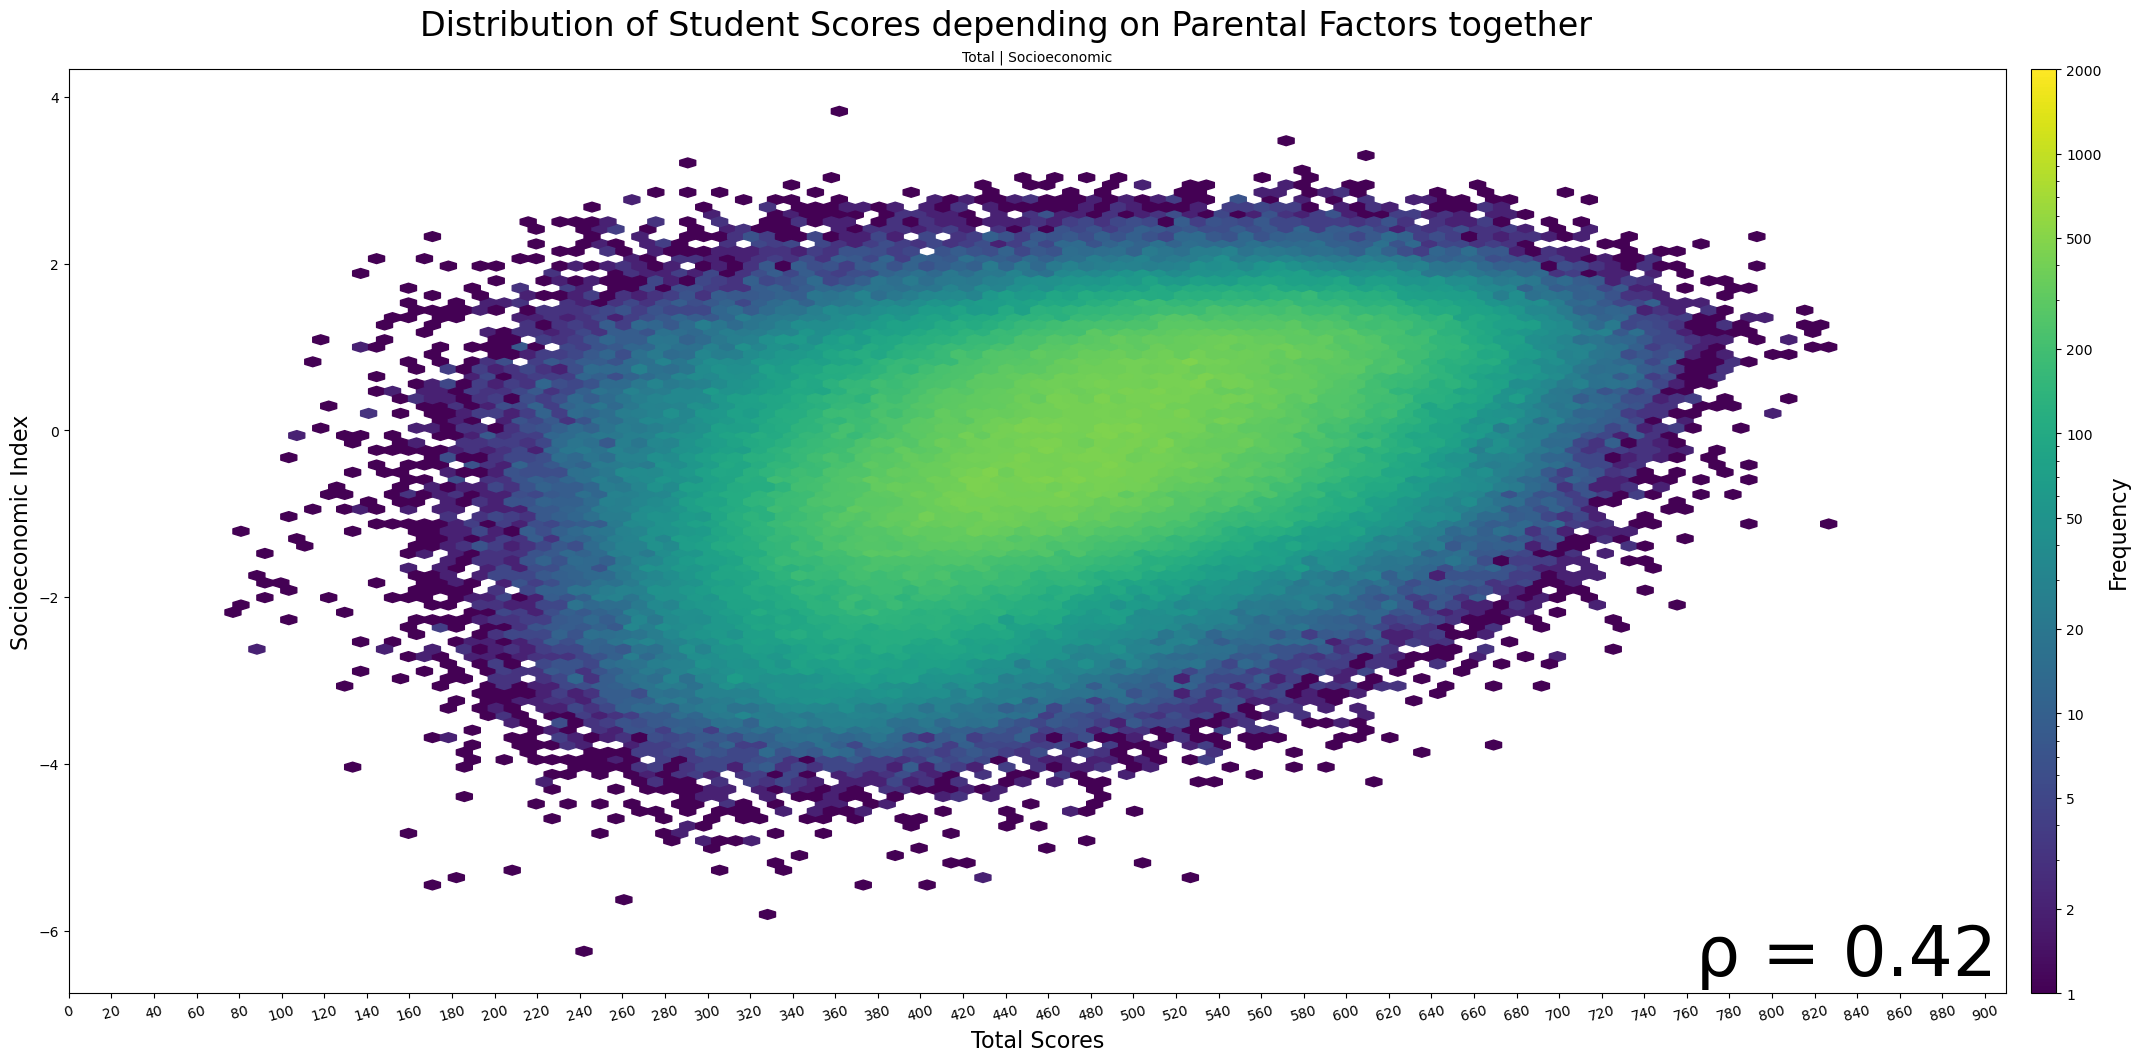

In [14]:
plot_dependent_distribution(pisa2012clean, Subjects=["Total"], Dependencies=["Socioeconomic"])
plt.savefig('./PNG/Distribution_of_Student_Scores_depending_on_Parental_Factors_together.png', bbox_inches='tight', dpi=300)

In the hexbin chart, which shows the relationship between students' overall scores and the socioeconomic index, some outliers can be seen despite the overall positive correlation. These could indicate unique circumstances or resilience to socioeconomic disadvantage.

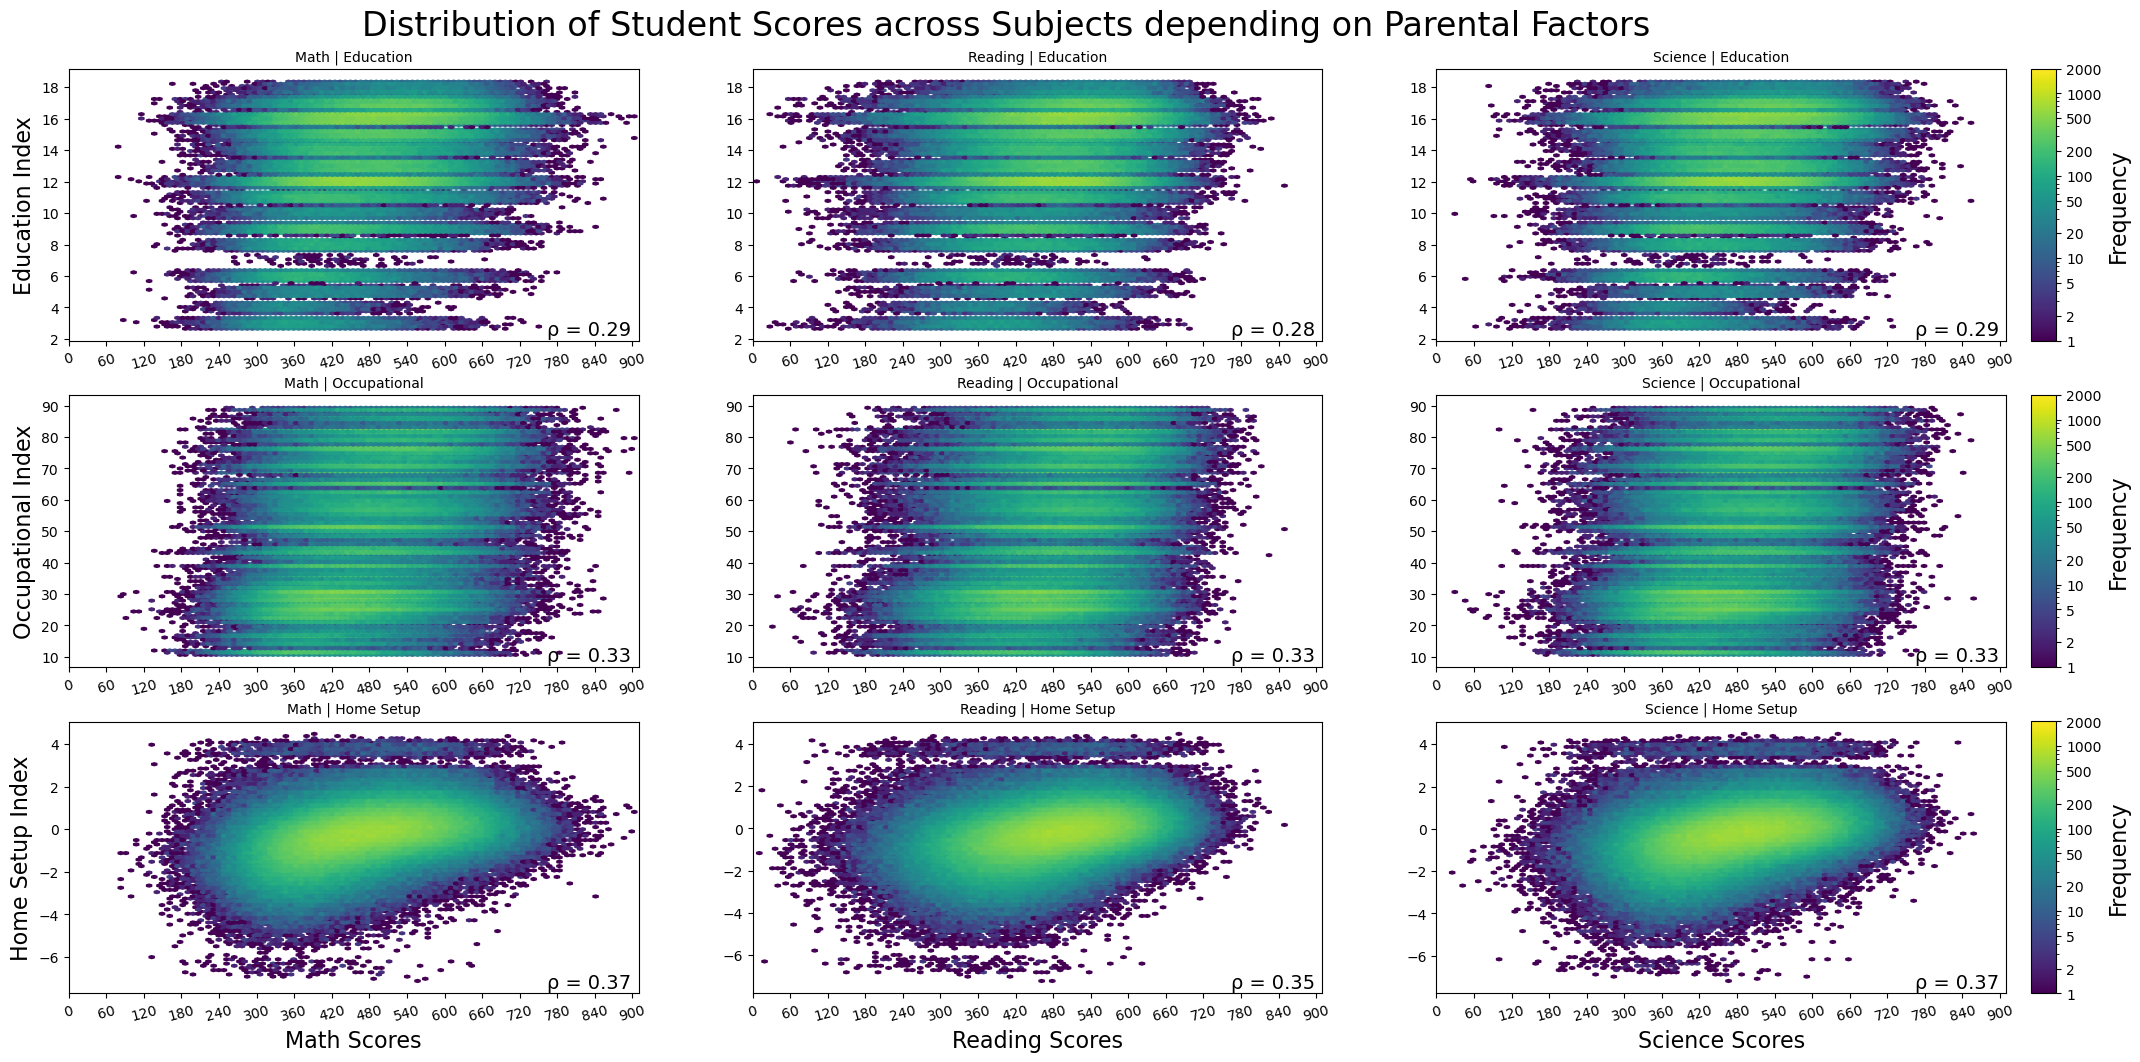

In [15]:
plot_dependent_distribution(pisa2012clean, Subjects, Dependencies)
plt.savefig('./PNG/Distribution_of_Student_Scores_across_Subjects_depending_on_Parental_Factors.png', bbox_inches='tight', dpi=300)

The last three pairs of hexbin diagrams examine the relationship between students' scores in maths, reading and science and various parental factors: Education, Occupation and Home Environment. The correlation coefficients vary by subject and parental factor, but they all show a positive correlation, suggesting that parental factors have an impact on academic achievement.

# Conclusion

The presented analyses and visualisations of the PISA 2012 data provide valuable insights into the educational landscape in different countries and cultures. They show that student performance is influenced by a variety of factors, including gender, socio-economic status and parental educational background. While some countries show outstanding averages and low variability in performance, others struggle with wider ranges of performance and lower averages. In particular, the analysis reveals that non-Western countries tend to perform worse and that socioeconomic conditions correlate significantly with student performance. The findings of this study can serve as a basis for policy makers to develop targeted measures to improve educational equity and promote achievement.

In [16]:
!jupyter nbconvert pisa2012clean.ipynb --to slides --post serve --no-input --no-prompt

^C
